In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import plotly.express as px

In [9]:
data = []
# for i in range(1, 6):
url = "https://www.ocean-du-nord.com/?page=5#voyages"
page = requests.get(url)   
soup = BeautifulSoup(page.text, 'html.parser')
agences = soup.find_all('div', class_="col-sm-12 col-md-6 col-lg-3 p-b-50")

    for agence in agences:
        prix = agence.find('span', class_="block2-price m-text6 p-r-5").text.strip().replace("\n", "").replace("frs CFA", "")
        # print(prix)
        
        localite = agence.find('strong').text.strip()
        # print(localite)
        data.append([prix, localite])

In [10]:
agences

[<div class="col-sm-12 col-md-6 col-lg-3 p-b-50">
 <!-- Block2 -->
 <div class="block2">
 <div class="block2-img wrap-pic-w of-hidden pos-relative block2">
 <img alt="IMG-PRODUCT" src="img/bus_dedans.JPG"/>
 <div class="block2-overlay trans-0-4">
 <div class="block2-btn-addcart w-size1 trans-0-4">
 <!-- Button -->
 <form action="Detail_programme_voyage" method="post">
 <button class="flex-c-m size1 bg4 bo-rad-23 hov1 s-text1 trans-0-4" name="voyage" value="63">
 <i class="fa fa-eye" style="padding-right: 5px"></i> Voir plus
                                             </button>
 </form>
 </div>
 </div>
 </div>
 <div class="shadow block2-txt p-t-20">
 <form action="Detail_programme_voyage" method="post">
 <button class="block2-name dis-block s-text3 p-b-5" href="Detail_programme_voyage" name="voyage" value="63">
 <strong><i class="fa fa-map-marker"></i> Pointe-noire - Madingou</strong>
 </button>
 </form>
 <span class="block2-price m-text6 p-r-5">
 <i class="fa fa-money"></i> 7000 / 500

In [49]:
dt = pd.DataFrame(data, columns=["prix", "localites"])
dt.to_csv("agence_voyage.csv")

In [2]:
df = pd.read_csv("agence_voyage.csv", sep=",", index_col=0)
df.head()

,prix,localites
0,15000 / 10000 Tous les jours,Brazzaville - Pointe-noire
1,15000 / 12000 Tous les jours,Brazzaville - Ouesso
2,8000 / 6000 Tous les jours,Brazzaville - Nkayi
3,7000 / 6000 Tous les jours,Brazzaville - Oyo
4,12000 / 10000 Mercredi Vendredi,Brazzaville - Okoyo


In [104]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,prix,localites
0,15000 / 10000 Tous les jours,Brazzaville - Pointe-noire
1,15000 / 12000 Tous les jours,Brazzaville - Ouesso
2,8000 / 6000 Tous les jours,Brazzaville - Nkayi
3,7000 / 6000 Tous les jours,Brazzaville - Oyo
4,12000 / 10000 Mercredi Vendredi,Brazzaville - Okoyo


In [105]:
df[['prix_adulte','prix_enfant']] = df['prix'].str.split("/", expand=True)
df.head()

,prix,localites,prix_adulte,prix_enfant
0,15000 / 10000 Tous les jours,Brazzaville - Pointe-noire,15000,10000 Tous les jours
1,15000 / 12000 Tous les jours,Brazzaville - Ouesso,15000,12000 Tous les jours
2,8000 / 6000 Tous les jours,Brazzaville - Nkayi,8000,6000 Tous les jours
3,7000 / 6000 Tous les jours,Brazzaville - Oyo,7000,6000 Tous les jours
4,12000 / 10000 Mercredi Vendredi,Brazzaville - Okoyo,12000,10000 Mercredi Vendredi


In [106]:
df[['prix_enfant','jour_voyage']] = df['prix_enfant'].str.split(n=1, expand=True)
df.head()

,prix,localites,prix_adulte,prix_enfant,jour_voyage
0,15000 / 10000 Tous les jours,Brazzaville - Pointe-noire,15000,10000,Tous les jours
1,15000 / 12000 Tous les jours,Brazzaville - Ouesso,15000,12000,Tous les jours
2,8000 / 6000 Tous les jours,Brazzaville - Nkayi,8000,6000,Tous les jours
3,7000 / 6000 Tous les jours,Brazzaville - Oyo,7000,6000,Tous les jours
4,12000 / 10000 Mercredi Vendredi,Brazzaville - Okoyo,12000,10000,Mercredi Vendredi


In [108]:
df.drop("prix", axis=1, inplace=True)
df.head()

,localites,prix_adulte,prix_enfant,jour_voyage
0,Brazzaville - Pointe-noire,15000,10000,Tous les jours
1,Brazzaville - Ouesso,15000,12000,Tous les jours
2,Brazzaville - Nkayi,8000,6000,Tous les jours
3,Brazzaville - Oyo,7000,6000,Tous les jours
4,Brazzaville - Okoyo,12000,10000,Mercredi Vendredi


In [109]:
df.dtypes

localites      object
prix_adulte    object
prix_enfant    object
jour_voyage    object
dtype: object

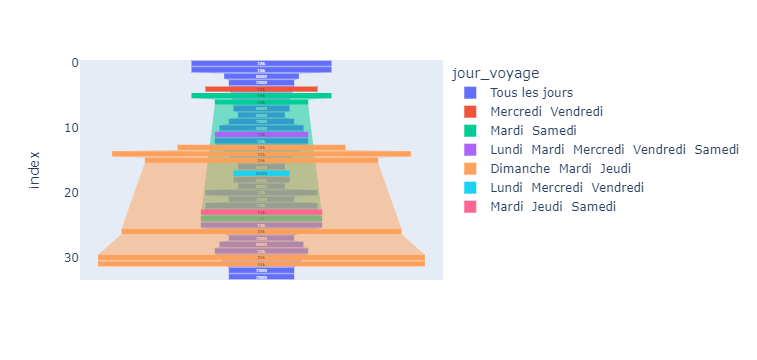

In [116]:
fig = px.funnel(df, x=df["prix_adulte"].astype('int'), color=df["jour_voyage"])
fig

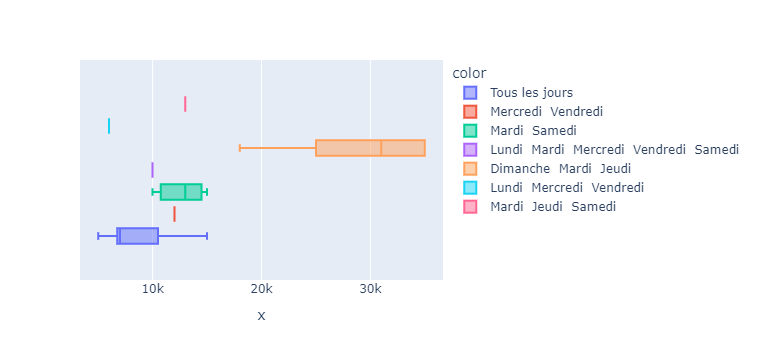

In [133]:
fig = px.box(dt, x=df['prix_adulte'].astype('int'), color=df["jour_voyage"])
fig

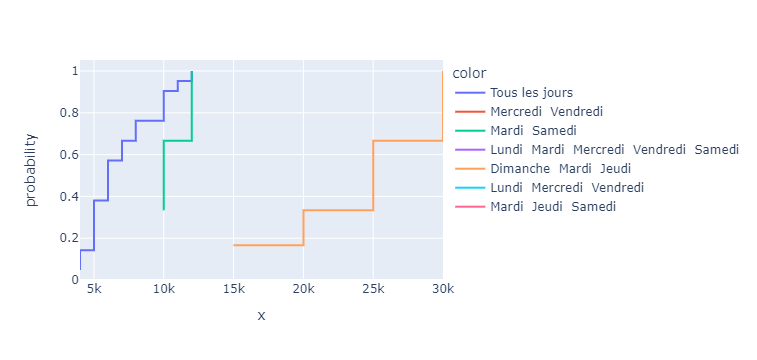

In [124]:
fig = px.ecdf(dt, x=df["prix_enfant"].astype('int'), color=df["jour_voyage"])
fig

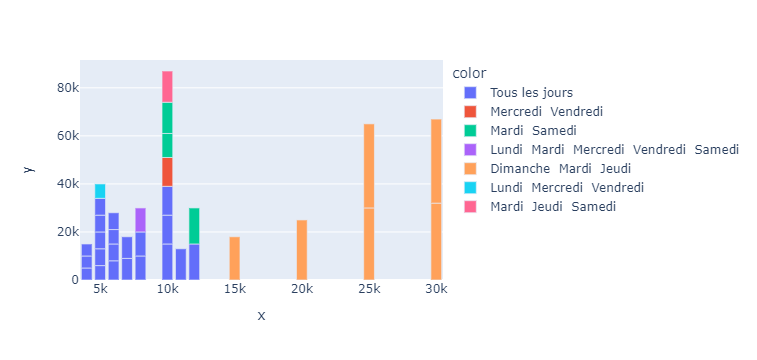

In [128]:
fig = px.bar(dt, x=df["prix_enfant"].astype('int'), y=df["prix_adulte"].astype('int'),
             color=df["jour_voyage"])
fig

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

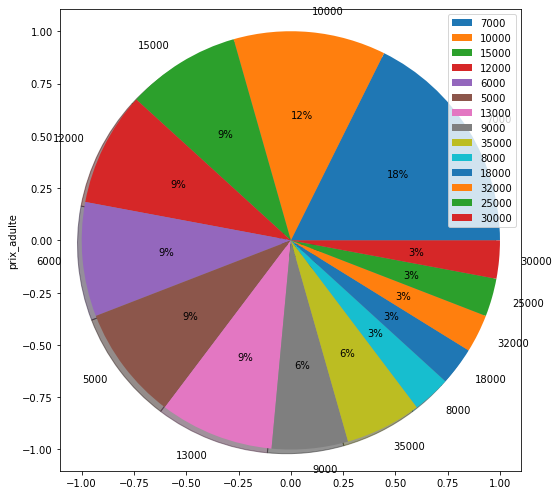

In [151]:
df["prix_adulte"].astype('int').value_counts().plot.pie(autopct="%.0f%%",figsize=(20, 8.5), frame=True, shadow=True).legend();

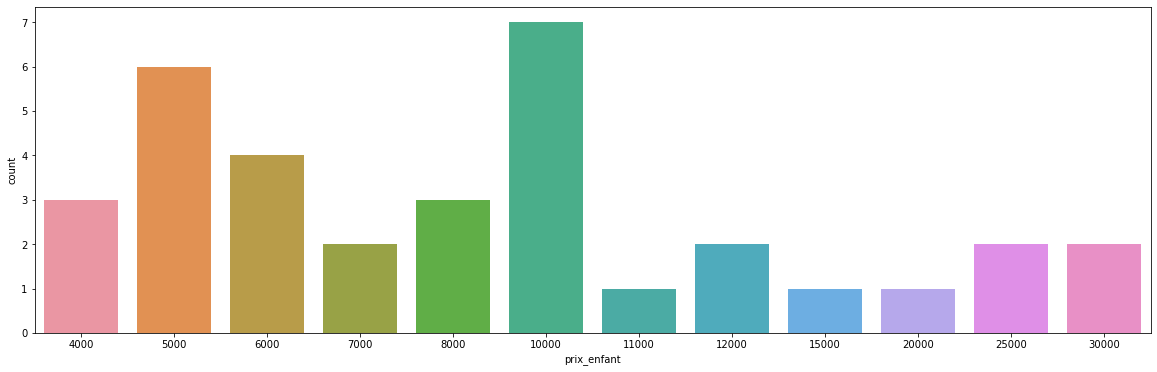

In [149]:
plt.figure(figsize=(20, 6))
sns.countplot(x=df["prix_enfant"].astype('int'));

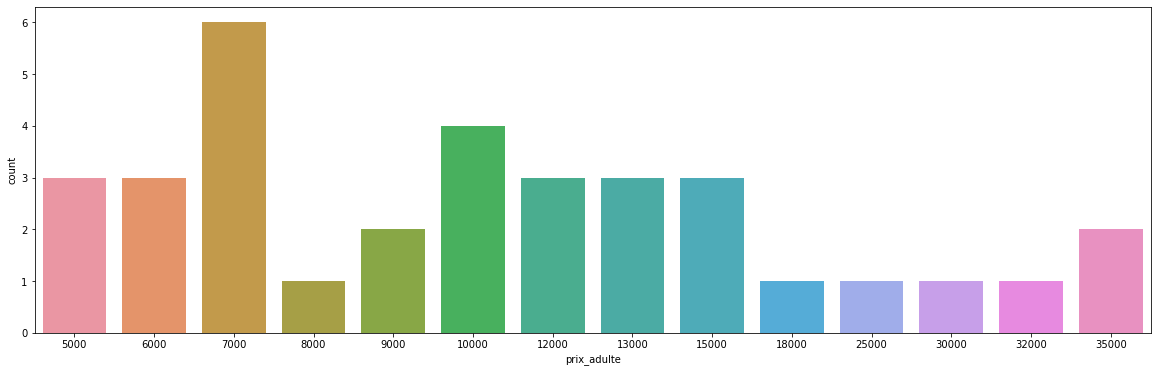

In [152]:
plt.figure(figsize=(20, 6))
sns.countplot(x=df["prix_adulte"].astype('int'));

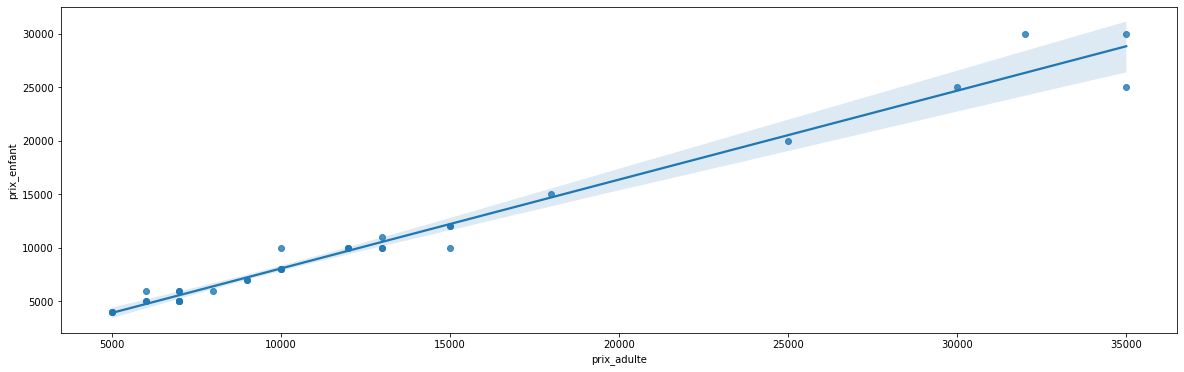

In [155]:
plt.figure(figsize=(20, 6))
sns.regplot(x=df["prix_adulte"].astype('int'), y=df["prix_enfant"].astype('int'));